In [1]:
import numpy as np
import pyhf
import matplotlib.pyplot as plt 
import uproot
import pandas as pd 
from pyhf.contrib.viz import brazil

In [2]:
path_to_hists = "~/Desktop/dm_sets/dark_tridents_analysis/old_samples/" 
dp_masses = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
uncertainty = 0.2
nominal_eps = 1e-3 
obs_eps = []
exp_eps = []
scaling_list = [] 
scaling = 2.

In [3]:
for mass in dp_masses:
    file_name="dt_hists_mass_"+str(mass)+"_E_total.root"
    print("Opening file: ", file_name)
    file = uproot.open(path_to_hists+file_name)
    print("Contents on this file: ", file.classnames())
    print("Signal events: {nevts:.2f}".format( nevts= np.sum(file["signal"].values())))
    print("Background events: {nevts:.2f}".format( nevts= np.sum(file["background"].values())))
    
    total_sig = np.sum(file["signal"].values())
    total_bkg = np.sum(file["background"].values())
    factor = scaling*(total_bkg/total_sig)
    total_sig_adjusted = np.sum(file["signal"].values()*factor)
    scaling_list.append(factor)
    
    # scaling signal, to have a reasonable signal strength between 0 and 10
    n_sig = (file["signal"].values()*factor).tolist()
    n_back = file["background"].values().tolist()
    back_sigma = (file["background"].values()*uncertainty).tolist()
    
    model=pyhf.simplemodels.uncorrelated_background(
        signal=n_sig, bkg=n_back,
        bkg_uncertainty=back_sigma)
    
    obs = n_back + model.config.auxdata
    
    poi_values = np.linspace(0., 10., 100)
    obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upperlimit(
        obs, model, poi_values, level=0.05, return_results=True)
    print(f"Upper limit (obs): μ = {obs_limit:.4f}")
    print(f"Upper limit (exp): μ = {exp_limits[2]:.4f}")
    obs_epsilon = (nominal_eps**2)*np.sqrt(obs_limit*factor)
    exp_epsilon = (nominal_eps**2)*np.sqrt(exp_limits[2]*factor)
    exp_eps.append(exp_epsilon)
    print(f"Upper limit (obs): epsilon2 = {obs_epsilon}")
    print(f"Upper limit (exp): epsilon2 = {exp_epsilon}")
    print("\n")
    

Opening file:  dt_hists_mass_0.01_E_total.root
Contents on this file:  {'signal;1': 'TH1D', 'background;1': 'TH1D'}
Signal events: 31472.11
Background events: 13.08


/home/lmlepin/anaconda3/envs/dark_trident/lib/python3.7/site-packages/pyhf/infer/calculators.py:369: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


Upper limit (obs): μ = 0.3623
Upper limit (exp): μ = 0.3623
Upper limit (obs): epsilon2 = 1.7354963096829177e-08
Upper limit (exp): epsilon2 = 1.7354963096829177e-08


Opening file:  dt_hists_mass_0.02_E_total.root
Contents on this file:  {'signal;1': 'TH1D', 'background;1': 'TH1D'}
Signal events: 3255.01
Background events: 13.08
Upper limit (obs): μ = 0.3665
Upper limit (exp): μ = 0.3665
Upper limit (obs): epsilon2 = 5.427139650948105e-08
Upper limit (exp): epsilon2 = 5.427139650948105e-08


Opening file:  dt_hists_mass_0.03_E_total.root
Contents on this file:  {'signal;1': 'TH1D', 'background;1': 'TH1D'}
Signal events: 751.23
Background events: 13.08
Upper limit (obs): μ = 0.3751
Upper limit (exp): μ = 0.3751
Upper limit (obs): epsilon2 = 1.1428791377398244e-07
Upper limit (exp): epsilon2 = 1.1428791377398244e-07


Opening file:  dt_hists_mass_0.04_E_total.root
Contents on this file:  {'signal;1': 'TH1D', 'background;1': 'TH1D'}
Signal events: 211.11
Background events: 13.08
Upper li

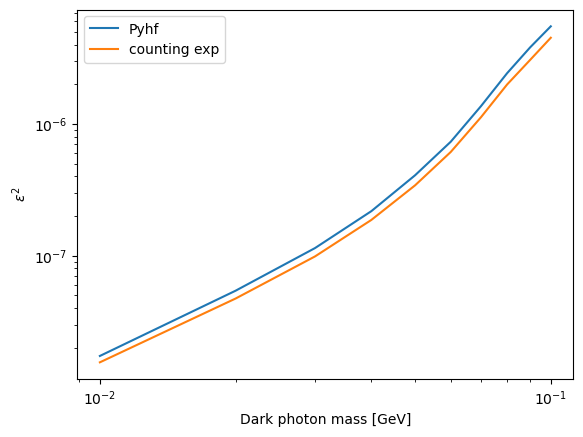

In [4]:
import pandas as pd
df = pd.read_csv(path_to_hists+"old_a01.csv")
plt.plot(dp_masses,exp_eps,label='Pyhf')
plt.plot(dp_masses,df['epsilon_a01'],label='counting exp')
plt.xlabel('Dark photon mass [GeV]')
plt.ylabel(r'$\varepsilon^{2}$')
plt.legend()
plt.yscale('log')
plt.xscale('log')